# Introduction

**kMeans Clustering**

Everyone claims to be underpaid and underappreciated at some point in their lives...now imagine if you had performance data to back that claim up! Fortunuately, for MLB players, we have such data! 

In this analysis, I used kMeans Clustering to group players together and evaluate if, based on wOBA (Weighted On Base Average), players were underpaid for their performance. kMeans Clustering is an unsupervised macine learning algorithm (meaning that we don't have an independent variable we are predicting for...instead, the algorithm helps find relationships that may not have been obvious at first glance). kMeans clusters players together based on the similiarities between their wOBA metric and salary. The ultimate goal was to cluster players, evaulate the mean wOBA/salaries of each cluster, identify the highest paid cluster, and find players who were underpaid based on having an above average wOBA for their cluster.

TLDR: Group players based on wOBA and salary. Then looked at highest performing cluster to find players whose salaries are below the group average and their wOBA is above the group average. 

<br>
<br>

Data Source: http://www.seanlahman.com/baseball-archive/statistics/

CSV used was generated from data from Sean Lahman's database found ^^^

This is salary and batting performance data from 2016. 

<br>

**Load Data and Packages Needed for Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("C:\\Users\\seasulli\\Downloads")

In [3]:
df = pd.read_csv('salaries_2016_V2.csv')
df.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,...,mvp,BABIP,OBP,1B,SLG,BA,OPS,ISO,wOBA,salary
0,arciaos01,2016,32,103,8,22,4,0,4,12,...,No,0.339623,0.289474,14,0.368932,0.213592,0.658406,0.155340,0.284447,535000
1,buxtoby01,2016,92,298,44,67,19,6,10,38,...,No,0.329480,0.284404,32,0.429530,0.224832,0.713934,0.204698,0.298361,512500
2,doziebr01,2016,155,615,104,165,35,5,42,99,...,No,0.279545,0.339623,83,0.546341,0.268293,0.885964,0.278049,0.368627,3000000
3,escobed01,2016,105,352,32,83,14,2,6,37,...,No,0.280000,0.280000,61,0.338068,0.235795,0.618068,0.102273,0.267420,2150000
4,mauerjo01,2016,134,494,68,129,22,4,11,49,...,No,0.301020,0.362847,92,0.388664,0.261134,0.751511,0.127530,0.334804,23000000


In [4]:
df.shape

(357, 31)

**Now, let's see who has the highest salary: Miguel Cabrera**

In [5]:
df.loc[df['salary'].idxmax()]

playerID    cabremi01
yearID           2016
G                 143
AB                327
R                  48
H                  95
2B                 15
3B                  5
HR                  1
RBI                22
SB                 10
CS                  2
BB                 30
SO                 42
IBB                 1
HBP                 3
SH                  3
SF                  2
GIDP                4
W                  79
allStar            No
mvp                No
BABIP        0.328671
OBP          0.353591
1B                 74
SLG          0.376147
BA            0.29052
OPS          0.729738
ISO         0.0856269
wOBA         0.318773
salary       28000000
Name: 309, dtype: object

In [6]:
names = df['playerID']

**A Nice Visual of the Distribution of Salaries**
Note - Salary is on a Ten Million Dollar Scale. 1.0 = $10Million 

Text(0.5, 1.0, 'Salary Distribution')

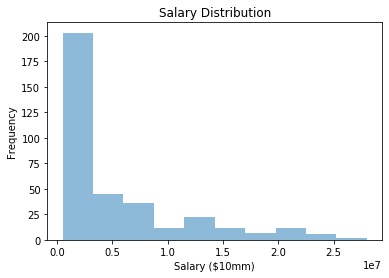

In [7]:
##wOBA
plt.hist(df['salary'], bins=10, alpha=0.5)
plt.xlabel('Salary ($10mm)')
plt.ylabel('Frequency')
plt.title('Salary Distribution')

In [8]:
#Test
df = df[['wOBA', 'salary']]
df.shape

(357, 2)

**Due to different scales of features, good to normalize/standardize the data**

In [9]:
#Normalize Data
min_max_scaler = MinMaxScaler().fit(df)

dfNorm= min_max_scaler.transform(df)

**How Does One Determine the Best Number of Clusters?**

In [10]:
#Function
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(df[clusters == c])
    return size

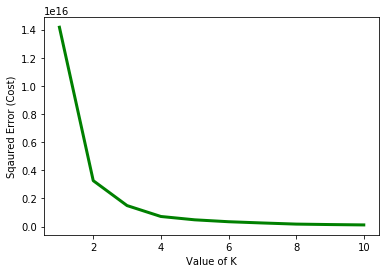

In [11]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(df) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k

**3 clusters is the best...so we will roll with 3.**

In [12]:
kmeans = KMeans(n_clusters=3, max_iter=500)
kmeans.fit(dfNorm)
clusters = kmeans.predict(dfNorm)

size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])
 

Size of Cluster 0 =  140
Size of Cluster 1 =  150
Size of Cluster 2 =  67


**Visualization of Clusters**

Text(0, 0.5, 'Salary')

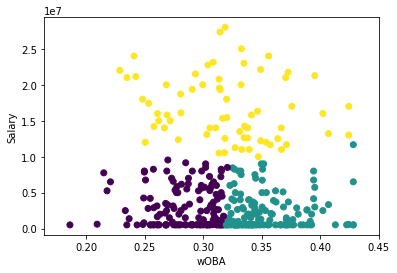

In [13]:
plt.scatter(df['wOBA'], df['salary'], c=clusters)
plt.xlabel("wOBA") 
plt.ylabel("Salary") 

In [14]:
df['cluster'] = clusters
df['name'] = names

In [15]:
df.isna().sum()

wOBA       0
salary     0
cluster    0
name       0
dtype: int64

In [16]:
df.shape

(357, 4)

In [17]:
cluster0 = df[df['cluster'] == 0]
cluster1 = df[df['cluster'] == 1]
cluster2 = df[df['cluster'] == 2]

c_mean0 = cluster0['salary'].mean()
c_mean1 = cluster1['salary'].mean()
c_mean2 = cluster2['salary'].mean()

print('Cluster 0 mean salary: ', c_mean0)
print('Cluster 1 mean salary: ', c_mean1)
print('Cluster 2 mean salary: ', c_mean2)

Cluster 0 mean salary:  2960144.6642857143
Cluster 1 mean salary:  2246760.2666666666
Cluster 2 mean salary:  16710783.970149254


**Clusters 0 and 2 have similar mean salaries. Cluster 1 is quite a bit higher**

In [18]:
w_mean0 = cluster0['wOBA'].mean()
w_mean1 = cluster1['wOBA'].mean()
w_mean2 = cluster2['wOBA'].mean()

print('Cluster 0 mean wOBA: ', cluster0['wOBA'].mean())
print('Cluster 1 mean wOBA: ', cluster1['wOBA'].mean())
print('Cluster 2 mean wOBA: ', cluster2['wOBA'].mean())

Cluster 0 mean wOBA:  0.28514501167142836
Cluster 1 mean wOBA:  0.35252317409333345
Cluster 2 mean wOBA:  0.31959960614925376


<br>
<br>

**Analysis**

Okay, so we now know that we know Cluster 2 is where we want to evaluate, let's dig in. 

First thing, I want to pull the players from Cluster 2 whose salaries are below the cluster's average. Then, I want to sort by players whose wOBA is the highest above the group's average. 

This will tell us the top players whose performance is above their cluster's average and are paid less than the group's mean - which suggests they are underpaid baed on their wOBA performance. 

In [21]:
bargain = cluster2[cluster2.salary <= c_mean2]

bargain['Salary Difference'] = (abs(bargain['salary'] - c_mean2))
bargain['wOBA Difference'] = (abs(bargain['wOBA'] - c_mean2))

s = bargain.sort_values('wOBA Difference')

In [22]:
s.head(10)

,wOBA,salary,cluster,name,Salary Difference,wOBA Difference
51,0.424347,13000000,2,headlch01,3.710784e+06,1.671078e+07
341,0.407021,13208333,2,mccutan01,3.502451e+06,1.671078e+07
328,0.402240,16000000,2,grandcu01,7.107840e+05,1.671078e+07
145,0.371199,11666667,2,butlebi03,5.044117e+06,1.671078e+07
221,0.366893,11000000,2,markani01,5.710784e+06,1.671078e+07
25,0.366663,14000000,2,cabreme01,2.710784e+06,1.671078e+07
93,0.363709,12500000,2,peraljh01,4.210784e+06,1.671078e+07
298,0.357285,11650000,2,donaljo02,5.060784e+06,1.671078e+07
15,0.353618,12000000,2,hillaa01,4.710784e+06,1.671078e+07
227,0.349121,12209424,2,hardyjj01,4.501360e+06,1.671078e+07


**Top 10 Underpaid Players Based on wOBA**

1. Chase Headley
2. Andrew McCutchen
3. Curtis Granderson
4. Billy Butler
5. Nick Markakis
6. Melky Cabrera
7. Jhonny Peralta
8. Josh Donaldson
9. Aaron Hill
10. JJ Hardy

<br>
<br>

**Now, let's say I'm a team and want to identify where I can aquire a player with high wOBA and a lower salary. Looking at the scatter plot, we see that there are several players with high wOBA and low salaries...so let's find them.**

In [23]:
bargain2 = cluster1[cluster1.wOBA >= w_mean1]
bargain2 = bargain2[bargain2.salary <=10000000]

s = bargain2.sort_values('wOBA', ascending=False)
s[-10:]

,wOBA,salary,cluster,name
211,0.361755,507500,1,whitety01
109,0.360065,3900000,1,blancgr01
280,0.359062,2000000,1,suzukic01
28,0.357899,2100000,1,garciav01
154,0.356957,1162500,1,buterdr01
245,0.356151,525500,1,solarya01
166,0.355790,515500,1,altheaa01
297,0.354628,521800,1,carreez01
347,0.353987,5000000,1,harpebr03
24,0.353172,2500000,1,avilaal01


**Top Ten Players with wOBA and Lower Salary**
1. Tyler White
2. Gregor Blanco
3. Ichiro Suzuki
4. Avisail Garcia
5. Drew Butera
6. Yangervis Solarte
7. Aaron Altherr
8. Ezequiel Carrera
9. Bryce Harper
10. Alex Avila